## ======================================================================

# 75.06/95.58 Organización de Datos

# Primer Cuatrimestre de 2018

# Trabajo Práctico 1: Análisis Exploratorio

## Integrantes:

<ul>
    <li>Andrés Silvestri: COMPLETAR</li>
    <li>Axel Brian Erlich: 94847</li>
    <li>Juan Manuel Gonzalez: 79979</li>
</ul>


## ======================================================================


# Introducción

Este trabajo está enfocado en hacer un primer análisis de los datos ofrecidos por trocafone, de manera que encontremos particularidades que puedan ser de interés para dicha entidad.

Siendo este el caso, lo primero que vamos a hacer es interiorizarnos de uno de los pilares que tiene la ciencia de datos, el negocio.


# ¿De qué se encarga Trocafone?

Trocafone es esencialmente una plataforma de comercio online para comprar y vender celulares usados de forma segura, con la garantía de que trocafone se encarga de validar la procedencia de los aparatos y de garantizar el correcto funcionamiento de los mismos.
En este caso, tracafone nos falicilo un set de datos que contiene distintos tipos de eventos que se registran en el sitio, ya sea visitas, compras u otros tipos de eventos que se detallaran luego

# Organización del Informe:

A continuación la forma en la que esta dividido el informe que llevaremos a cabo.
Lo primero será el armado, formateado y limpieza de los datos, luego haremos análisis general para entender un poco mas el negocio. Finalmente se hara un analisis un poco mas fino sobre los datos para contestar algunas preguntas que podrían llegar a interesar.


## 1 - Importación y estructura de los datos:

    1.1 - Configuración básica y obtención de los datasets.
    1.2 - Procesamiento general de las información y armado básico.
    1.3 - Resumen y cuestiones a tener en cuenta sobre el informe.
    
    
## 2 - Analisis sobre visitas y campañas publicitarias:

    2.1 - Como evoluciono la cantidad de visitas en el año 2018?
    2.2 - Se realizó alguna campaña publicitaria fuerte?
    2.3 - Habra correlacion entre las campañas publicitarias y las visitas?

# 1 - Importación y estructura de los datos:

## 1.1 - Configuración básica y obtención de los datasets.

In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)
pd.set_option('display.max_columns', 50)

In [2]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
eventos = pd.read_csv('events.csv')

In [3]:
## ACA PASAMOS LAS COLUMNAS QUE TIENEN UNA CANTIDAD DE VALORES LIMITADA A UN TIPO CATEGORY
eventos['event'] = eventos['event'].astype('category')
eventos['condition'] = eventos['condition'].astype('category')
eventos['storage'] = eventos['storage'].astype('category')
eventos['search_engine'] = eventos['search_engine'].astype('category')
eventos['channel'] = eventos['channel'].astype('category')
eventos['new_vs_returning'] = eventos['new_vs_returning'].astype('category')
eventos['device_type'] = eventos['device_type'].astype('category')
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'], infer_datetime_format=True)

## ======================================================================

## 1.2 - Procesamiento general de las información y armado básico.

Una vista a alto nivel de los datos y algunos tratamientos para mejorar la permormance de ejecucion sobre el set de datos.


## ======================================================================



### 1.2.1 - Eventos: 

Este set de datos esta basado en los eventos que se van registrando en la web, a continuacion se enumeran segun su frecuencia, ver enuncia de tp para una breve explicacion sobre cada uno.

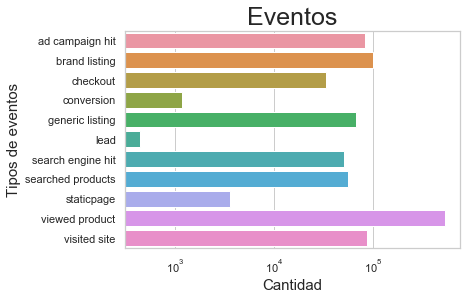

In [4]:
## CONTAMOS LAS APARICIONES DE CADA EVENTO.
eventos_frecuencia = eventos['event'].value_counts()
g = sns.barplot(x=eventos_frecuencia.values, y=eventos_frecuencia.index)
g.set_title("Eventos", fontsize=25)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Tipos de eventos", fontsize=15)
g.set_xscale('log')

### 1.2.2 - Sistemas operativos: 


# Completar con cosas de sistemas operativos

## ======================================================================

## 1.3 - Resumen y cuestiones a tener en cuenta sobre el informe.

COMPLETAR

## ======================================================================

# 1 - Analisis sobre visitas y campañas publicitarias:

### 2.1 - Como evoluciono la cantidad de visitas en el año 2018?

In [9]:
# primero obtengo aquellos registros que me indican una visita a un producto
visitaProducto = eventos.loc[eventos['event'] == 'viewed product']

# Miro la evolucion en la cantidad de visitas a productos en el año 2018, considerando que solo hay informacion de 2018
visitas_a_productos = visitaProducto.groupby(visitaProducto['timestamp'].dt.strftime('%B'))['event'].count()

visitas = pd.DataFrame()
visitas['Visitas a pruductos'] = visitas_a_productos
visitas = visitas.reset_index()
visitas['timestamp'] = pd.Series(pd.Categorical(visitas['mes'], categories=["January","February","March","April","May", "Ju"]))
visitas['mes'] = ''

visitas.loc[visitas.timestamp.str.contains('January', na=False), 'mes'] = 'ENERO'
visitas.loc[visitas.timestamp.str.contains('February', na=False), 'mes'] = 'FEBRERO'
visitas.loc[visitas.timestamp.str.contains('March', na=False), 'mes'] = 'MARZO'
visitas.loc[visitas.timestamp.str.contains('April', na=False), 'mes'] = 'ABRIL'
visitas.loc[visitas.timestamp.str.contains('May', na=False), 'mes'] = 'MAYO'
visitas.loc[visitas.timestamp.str.contains('June', na=False), 'mes'] = 'JUNIO'
visitas['timestamp'] = pd.Series(pd.Categorical(visitas['mes'], categories=["ENERO","FEBRERO","MARZO","ABRIL","MAYO", "JUNIO"]))


KeyError: 'mes'

Text(0,0.5,'Cantidad de visitas')

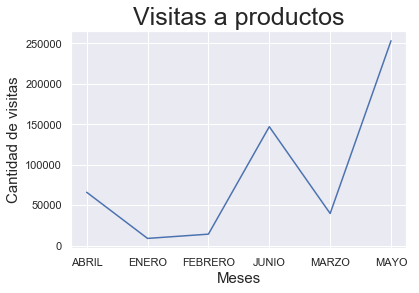

In [7]:
sns.set(style="darkgrid")

g = sns.lineplot(x="mes",y="Visitas a pruductos",data=visitas)
g.set_title("Visitas a productos", fontsize=25)
g.set_xlabel("Meses", fontsize=15)
g.set_ylabel("Cantidad de visitas", fontsize=15)


### En el grafico se puede notar un creciente numero de visitas a lo largo del anio, con un salto notable en mayo, veremos si estos numeros fueron causados por una campaña publicitaria

## 2.2 - Se realizó alguna campaña publicitaria fuerte?


In [92]:
# primero obtengo aquellos registros que me indican una visita por campaña
visitaPorCampaña = eventos.loc[eventos['event'] == 'ad campaign hit']

# Miro la evolucion en la cantidad de visitas  en el año 2018, considerando que solo hay informacion de 2018
visitas_a_productos_por_campaña = visitaPorCampaña.groupby(visitaPorCampaña['timestamp'].dt.strftime('%B'))['event'].count()
visitas_a_productos_por_campaña.reset_index()


visitas['Visitas por campaña'] = visitas_a_productos_por_campaña.reset_index()['event']

AttributeError: 'FacetGrid' object has no attribute 'set_title'

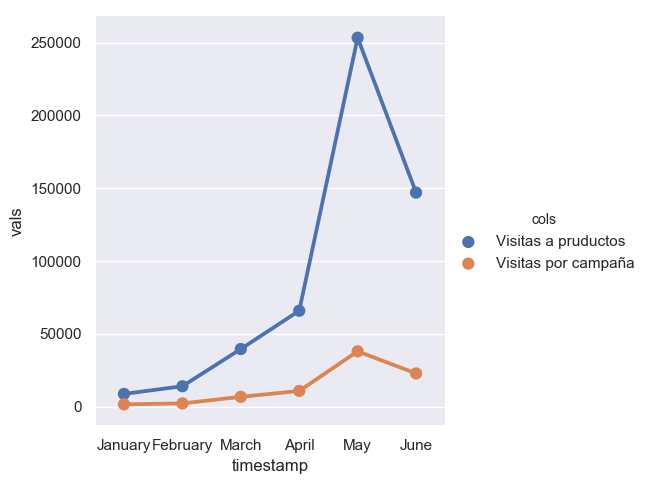

In [93]:
df = visitas.melt('timestamp', var_name='cols',  value_name='vals')
g = sns.factorplot(x="timestamp", y="vals", hue='cols', data=df)

#g = sns.lineplot(x="timestamp",y="Visitas por campaña",data=visitas)
g.set_title("Visitas", fontsize=25)
g.set_xlabel("Meses", fontsize=15)
g.set_ylabel("Cantidad de Visitas", fontsize=15)


## 2.3 - Habra correlacion entre las campañas publicitarias y las visitas?

In [94]:
df

,timestamp,cols,vals
0,April,Visitas a pruductos,65944
1,February,Visitas a pruductos,14130
2,January,Visitas a pruductos,8851
3,June,Visitas a pruductos,147028
4,March,Visitas a pruductos,39666
5,May,Visitas a pruductos,253312
6,April,Visitas por campaña,10888
7,February,Visitas por campaña,2340
8,January,Visitas por campaña,1702
9,June,Visitas por campaña,22917
